<a href="https://colab.research.google.com/github/Eryc418/Analise_Dados_Parte2/blob/main/Prova_Unidade_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas necessárias

In [2]:
import pandas as pd
import numpy as np

import requests as rq
from bs4 import BeautifulSoup
import re

### Obtendo dados e salvando em um objeto BeautifulSoup

In [3]:
inserir = input("Digite o conteúdo que deseja buscar no StackOverflow: ")
url = rq.get('https://stackoverflow.com/questions/tagged/' + inserir) # URL + Palavra chave que será pesquisada
soup = BeautifulSoup(url.text,'html.parser') #objeto BeautifulSoup 

Digite o conteúdo que deseja buscar no StackOverflow: python


In [4]:
print(soup) # Conteúdo da Página

<!DOCTYPE html>

<html class="html__responsive ">
<head>
<title>Newest 'python' Questions - Stack Overflow</title>
<link href="https://cdn.sstatic.net/Sites/stackoverflow/Img/favicon.ico?v=ec617d715196" rel="shortcut icon"/>
<link href="https://cdn.sstatic.net/Sites/stackoverflow/Img/apple-touch-icon.png?v=c78bd457575a" rel="apple-touch-icon"/>
<link href="https://cdn.sstatic.net/Sites/stackoverflow/Img/apple-touch-icon.png?v=c78bd457575a" rel="image_src"/>
<link href="/opensearch.xml" rel="search" title="Stack Overflow" type="application/opensearchdescription+xml"/>
<meta content="width=device-width, height=device-height, initial-scale=1.0, minimum-scale=1.0" name="viewport"/>
<meta content="website" property="og:type">
<meta content="https://stackoverflow.com/questions/tagged/python" property="og:url"/>
<meta content="Stack Overflow" property="og:site_name"/>
<meta content="https://cdn.sstatic.net/Sites/stackoverflow/Img/apple-touch-icon@2.png?v=73d79a89bded" itemprop="image primaryI

In [5]:
print(soup.prettify()) # Imprimindo de forma aninhada;

<!DOCTYPE html>
<html class="html__responsive ">
 <head>
  <title>
   Newest 'python' Questions - Stack Overflow
  </title>
  <link href="https://cdn.sstatic.net/Sites/stackoverflow/Img/favicon.ico?v=ec617d715196" rel="shortcut icon"/>
  <link href="https://cdn.sstatic.net/Sites/stackoverflow/Img/apple-touch-icon.png?v=c78bd457575a" rel="apple-touch-icon"/>
  <link href="https://cdn.sstatic.net/Sites/stackoverflow/Img/apple-touch-icon.png?v=c78bd457575a" rel="image_src"/>
  <link href="/opensearch.xml" rel="search" title="Stack Overflow" type="application/opensearchdescription+xml"/>
  <meta content="width=device-width, height=device-height, initial-scale=1.0, minimum-scale=1.0" name="viewport"/>
  <meta content="website" property="og:type">
   <meta content="https://stackoverflow.com/questions/tagged/python" property="og:url"/>
   <meta content="Stack Overflow" property="og:site_name"/>
   <meta content="https://cdn.sstatic.net/Sites/stackoverflow/Img/apple-touch-icon@2.png?v=73d79a89

In [6]:
soup.head # Imprimindo Head da página;

<head>
<title>Newest 'python' Questions - Stack Overflow</title>
<link href="https://cdn.sstatic.net/Sites/stackoverflow/Img/favicon.ico?v=ec617d715196" rel="shortcut icon"/>
<link href="https://cdn.sstatic.net/Sites/stackoverflow/Img/apple-touch-icon.png?v=c78bd457575a" rel="apple-touch-icon"/>
<link href="https://cdn.sstatic.net/Sites/stackoverflow/Img/apple-touch-icon.png?v=c78bd457575a" rel="image_src"/>
<link href="/opensearch.xml" rel="search" title="Stack Overflow" type="application/opensearchdescription+xml"/>
<meta content="width=device-width, height=device-height, initial-scale=1.0, minimum-scale=1.0" name="viewport"/>
<meta content="website" property="og:type">
<meta content="https://stackoverflow.com/questions/tagged/python" property="og:url"/>
<meta content="Stack Overflow" property="og:site_name"/>
<meta content="https://cdn.sstatic.net/Sites/stackoverflow/Img/apple-touch-icon@2.png?v=73d79a89bded" itemprop="image primaryImageOfPage" property="og:image"/>
<meta content="s

In [7]:
soup.body # Imprimindo informações do Body;

<body class="tagged-questions-page unified-theme">
<div id="notify-container"></div>
<div id="custom-header"></div>
<header class="top-bar js-top-bar top-bar__network">
<div class="wmx12 mx-auto d-flex ai-center h100" role="menubar">
<div class="-main flex--item">
<a aria-controls="left-sidebar" aria-expanded="false" aria-haspopup="true" class="left-sidebar-toggle p0 ai-center jc-center js-left-sidebar-toggle" href="#" role="menuitem"><span class="ps-relative"></span></a>
<div class="topbar-dialog leftnav-dialog js-leftnav-dialog dno">
<div class="left-sidebar js-unpinned-left-sidebar" data-can-be="left-sidebar" data-is-here-when="sm"></div>
</div>
<a class="-logo js-gps-track" data-gps-track="top_nav.click({is_current:false, location:5, destination:8})" href="https://stackoverflow.com">
<span class="-img _glyph">Stack Overflow</span>
</a>
</div>
<ol class="list-reset d-flex gs4" role="presentation">
<li class="flex--item md:d-none">
<a class="-marketing-link js-gps-track" data-ga='["t

> Para identificar melhor o que você precisa, você pode inspecionar o código no navegador para encontrar a localização dos itens e nomes de ids;

> A forma normalmente usada para busca os elementos são: **find() e find_all()**. 


---


"find()" é usada quando queremos recuperar apenas uma ocorrência da tag (a primeira encontrada será retornada) -> O retorno dele é uma tag, possibilitando a realização de pesquisas internas.


---


"find_all()" vai buscar todas as ocorrências do elemento procurado imprimindo uma lista desses elementos. -> O retorno dele é um ResultSet,que permite que o usemos como uma lista.


---

In [8]:
divTitulo = soup.findAll('div', {'class': 'summary'}) # Busca por todas as divs que contém a classe com conteudo "summary";
arrayTitulo = []

for i in range(0, len(divTitulo)): # Percorrendo todas as divs que contem H3
  arrayTitulo.append(divTitulo[i].find('h3').get_text())# Adicionando ao Array todos titulos do StackOverflow de acordo com a pesquisa do usuário 
  print(arrayTitulo[i]) # Printando conteúdo
  print('\n')


How to access all the child table entries based on parent table entry in Flask-SQLAlchemy


Using contextvar to keep track of async loop in Python


PYODBC não chama stored procedure no SQL Server


Check if python script was executed from command line


Import class from another file, but element name is not defined (executable example)


Python/Django routing messed up when clicking a button


BeeWare is good like flutter?


How to iterate through a pandas dataframe and find all rows with given value


Can't return turtle position


How can I find rows in Pandas DataFrame where the sum of 2 rows is greater than some value?


Simple Signal/emit to print message


ROS2 Galactic - Python package not copied to Install folder


Detect language python discord bot


Progress bar multiprocessing


How to dock bars to the bottom of the bounding box with Matplotlib in Python?


How to create custom wallet for BEP20 tokens by python


Finding inverse of an ill-conditioned matrix


How to pass a

In [9]:
divLinks = soup.findAll('a', {'class': 'question-hyperlink'}) #Busca por Todos os Links da Class = question-hyperlink
arrayLink = []

for j in range(0, 50): #percorrendo Array
  arrayLink.append(divLinks[j]['href']) #Adicionando Links no array de links
  
  print(arrayLink[j]) #Printando todos os links
  print('\n')

/questions/70748055/how-to-access-all-the-child-table-entries-based-on-parent-table-entry-in-flask-s


/questions/70748053/using-contextvar-to-keep-track-of-async-loop-in-python


/questions/70748049/pyodbc-n%c3%a3o-chama-stored-procedure-no-sql-server


/questions/70747996/check-if-python-script-was-executed-from-command-line


/questions/70747993/import-class-from-another-file-but-element-name-is-not-defined-executable-exam


/questions/70747989/python-django-routing-messed-up-when-clicking-a-button


/questions/70747986/beeware-is-good-like-flutter


/questions/70747984/how-to-iterate-through-a-pandas-dataframe-and-find-all-rows-with-given-value


/questions/70747976/cant-return-turtle-position


/questions/70747968/how-can-i-find-rows-in-pandas-dataframe-where-the-sum-of-2-rows-is-greater-than


/questions/70747947/simple-signal-emit-to-print-message


/questions/70747876/ros2-galactic-python-package-not-copied-to-install-folder


/questions/70747854/detect-language-python-discord-

In [25]:
divDesc = soup.findAll('div', {'class': 'excerpt'}) # Busca por todas as divs que contém a classe com conteudo "divDesc";
arrayDesc = []
for desc in divDesc: # Descrições
  arrayDesc.append(desc.get_text().replace("\r\n", ""))
print(len(arrayDesc))

50


In [91]:
divView = soup.findAll('div', {'class': 'views'}) # Busca por todas as divs que contém a classe com conteudo "divDesc";
arrayView = []
for desc in divView: # Descrições
  arrayView.append(float(desc.get_text().replace("views", "")))
print(len(arrayView))

50


In [90]:
divVotos = soup.findAll('span', {'class': 'vote-count-post'}) # Busca por todas as divs que contém a classe com conteudo "divDesc";
arrayVotos = []
for desc in divVotos: # Descrições
  arrayVotos.append(float(desc.text))
print(arrayVotos)

[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, -2.0, 0.0, 0.0, 1.0, 0.0, 0.0, -1.0, 0.0, 0.0, -1.0, 1.0, 0.0, 0.0, 0.0, -4.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, -6.0, 0.0, 0.0, -1.0, 0.0, -1.0, -1.0, 0.0, -1.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [93]:
divResp = soup.findAll('div', {'class': 'status'}) # Busca por todas as divs que contém a classe com conteudo "divDesc";
arrayResp = []
for desc in divResp: # Descrições
  arrayResp.append(float(desc.strong.text))
print(arrayResp)

[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 3.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 2.0, 1.0, 2.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 2.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0]


In [62]:
divTags = soup.findAll('div', {'class': 'tags'}) # Busca por todas as divs que contém a classe com conteudo "divDesc";
arrayTags = []
for desc in divTags: # Descrições
  tags = []
  for tag in desc.findAll('a'):
    tags.append(tag.text)
  try:
    arrayTags.append(tags[1])  
  except:  
    arrayTags.append(tags[0])
print(arrayTags)

['html', 'async-await', 'sql-server', 'windows', 'python-3.x', 'django', 'python-3.x', 'excel', 'turtle-graphics', 'pandas', 'pyside2', 'python-3.x', 'discord', 'multiprocessing', 'matplotlib', 'bep20', 'numpy', 'docker', 'pandas', 'selenium', 'function', 'numpy', 'docker', 'pandas', 'python-os', 'coordinates', 'deep-learning', 'pandas', 'arrays', 'performance', 'statistics', 'streamlit', 'sockets', 'scipy', 'tensorflow', 'sql', 'pseudocode', 'nlp', 'json', 'class', 'python', 'function', 'machine-learning', 'pandas', 'flask', 'python-2.7', 'list', 'nested-loops', 'breadth-first-search', 'pyqt5']


In [94]:
dadosRetorno = {} 
#Printando tamanho dos array para verificar se estão do mesmo tamanho
print(len(arrayTitulo))
print(len(arrayLink))
#Adicionando dados dos titulos e links no dicionario
try:
  dadosRetorno ['titulos'] = arrayTitulo
  dadosRetorno ['links'] = arrayLink
  dadosRetorno ['Descrição'] = arrayDesc
  dadosRetorno ['Visualizações'] = arrayView
  dadosRetorno ['Votos'] = arrayVotos
  dadosRetorno ['Respostas'] = arrayResp
  dadosRetorno ['Tags'] = arrayTags
except Exception as e:
  print(e)

50
50


In [95]:
df = pd.DataFrame(dadosRetorno)#Gerando dataFrame com dados do dicionario  
df_csv_dados = df.to_csv('dados') #Tranformando e gerando em arquivo CSV
pd.read_csv('dados') # Lendo arquivo CSV

,Unnamed: 0,titulos,links,Descrição,Visualizações,Votos,Respostas,Tags
0,0,How to access all the child table entries base...,/questions/70748055/how-to-access-all-the-chil...,I am developing a flask-based webs...,2.0,0.0,0.0,html
1,1,Using contextvar to keep track of async loop i...,/questions/70748053/using-contextvar-to-keep-t...,I am trying to work with a simple ...,4.0,0.0,0.0,async-await
2,2,PYODBC não chama stored procedure no SQL Server,/questions/70748049/pyodbc-n%c3%a3o-chama-stor...,"Caros, estou tentando criar uma AP...",5.0,0.0,0.0,sql-server
3,3,Check if python script was executed from comma...,/questions/70747996/check-if-python-script-was...,I have three python scripts; one i...,12.0,0.0,0.0,windows
4,4,"Import class from another file, but element na...",/questions/70747993/import-class-from-another-...,The 3 example files executable are...,9.0,1.0,0.0,python-3.x
5,5,Python/Django routing messed up when clicking ...,/questions/70747989/python-django-routing-mess...,I am working through a basic djang...,12.0,0.0,1.0,django
6,6,BeeWare is good like flutter?,/questions/70747986/beeware-is-good-like-flutter,as I understanding BeeWare frame w...,7.0,-2.0,0.0,python-3.x
7,7,How to iterate through a pandas dataframe and ...,/questions/70747984/how-to-iterate-through-a-p...,If I have a excel file containing ...,12.0,0.0,1.0,excel
8,8,Can't return turtle position,/questions/70747976/cant-return-turtle-position,when trying to return the position...,17.0,0.0,0.0,turtle-graphics
9,9,How can I find rows in Pandas DataFrame where ...,/questions/70747968/how-can-i-find-rows-in-pan...,"In a dataset like the one below, I...",14.0,1.0,1.0,pandas


In [54]:
df.describe()

,titulos,links,Descrição,Visualizações,Votos,Respostas,Tags
count,50,50,50,50,50,50,50
unique,50,50,50,25,6,4,48
top,Progress bar multiprocessing,/questions/70747559/data-envelopment-analysis-...,The code below outputs the bar gra...,9,0,0,"[python, pandas]"
freq,1,1,1,7,35,31,2


In [60]:
df['titulos'].unique()

array(['How to access all the child table entries based on parent table entry in Flask-SQLAlchemy',
       'Using contextvar to keep track of async loop in Python',
       'PYODBC não chama stored procedure no SQL Server',
       'Check if python script was executed from command line',
       'Import class from another file, but element name is not defined (executable example)',
       'Python/Django routing messed up when clicking a button',
       'BeeWare is good like flutter?',
       'How to iterate through a pandas dataframe and find all rows with given value',
       "Can't return turtle position",
       'How can I find rows in Pandas DataFrame where the sum of 2 rows is greater than some value?',
       'Simple Signal/emit to print message',
       'ROS2 Galactic - Python package not copied to Install folder',
       'Detect language python discord bot',
       'Progress bar multiprocessing',
       'How to dock bars to the bottom of the bounding box with Matplotlib in Python?

In [66]:
df['Tags'].value_counts()


pandas                  5
python-3.x              3
docker                  2
function                2
numpy                   2
async-await             1
json                    1
pseudocode              1
python                  1
statistics              1
nlp                     1
pyside2                 1
nested-loops            1
html                    1
flask                   1
deep-learning           1
performance             1
streamlit               1
sockets                 1
python-2.7              1
breadth-first-search    1
excel                   1
sql                     1
turtle-graphics         1
bep20                   1
matplotlib              1
python-os               1
arrays                  1
machine-learning        1
scipy                   1
selenium                1
discord                 1
pyqt5                   1
django                  1
sql-server              1
list                    1
coordinates             1
windows                 1
class       

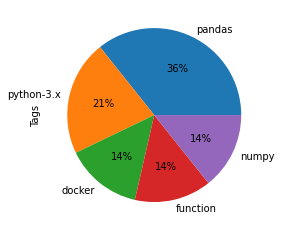

In [67]:
df['Tags'].value_counts().head().plot.pie(autopct='%.0f%%')#Pegando outras tags mais procuradas

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

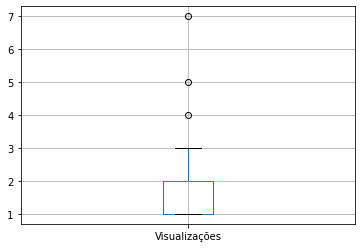

In [77]:
df['Visualizações'].value_counts().plot.box(grid = True)

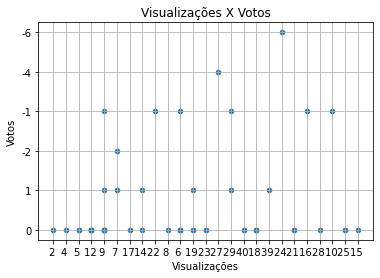

In [78]:
df.plot.scatter(x='Visualizações',y='Votos', title = 'Visualizações X Votos', grid = True)

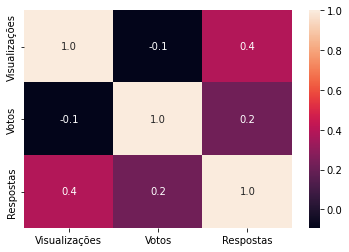

In [96]:
corr = df.select_dtypes(exclude='object').corr()
sb.heatmap(corr, annot=True, fmt=".1f")

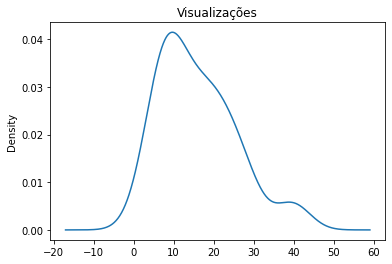

In [97]:
df['Visualizações'].plot.kde(title='Visualizações')

In [100]:
autores = ' '.join(df['Tags'].dropna())

In [103]:
from wordcloud import WordCloud, STOPWORDS

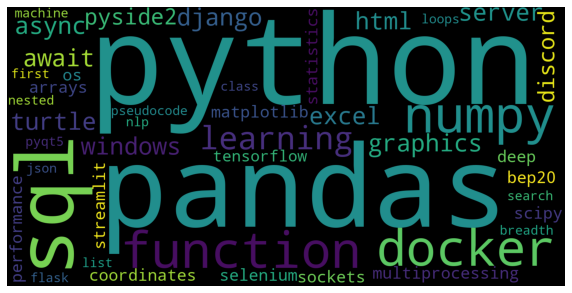

In [104]:
wordcloudAutores = WordCloud(background_color="black", width=1600, height=800).generate(autores)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.set_axis_off() #não mostra os valores dos eixos x e Y
plt.imshow(wordcloudAutores);